#**Случайный лес (Random Forest)**





**Случайный лес** — один из самых потрясающих алгоритмов машинного обучения, придуманные Лео Брейманом и Адель Катлер ещё в прошлом веке. Он дошёл до нас в «первозданном виде» (никакие эвристики не смогли его существенно улучшить) и является одним из немногих универсальных алгоритмов. Универсальность заключается, в том, что он хорош во многих задачах (есть случайные леса для решения задач классификации, регрессии, кластеризации, поиска аномалий, селекции признаков и т.д.).


# **Беггинг**

Как и у каждого человека в жизни появляются мысли "а что дальше?", так и ML-щика должен появится когда-то вопрос что делать, если вы уже нашли лучшую модель и повысить точность модели больше не можете? В таком случае нужно применить более продвинутые техники машинного обучения, которые можно объединить словом «ансамбли».


**Ансамбль** — это некая совокупность, части которой образуют единое целое. То есть можно объединить несколько алгоритмов вместе и судить по ним насколько верен ответ.

## **Ансамбль**

Хорошим примером ансамблей считается теорема Кондорсе «о жюри присяжных» (1784). Если каждый член жюри присяжных имеет независимое мнение, и если вероятность правильного решения члена жюри больше 0.5, то тогда вероятность правильного решения присяжных в целом возрастает с увеличением количества членов жюри и стремится к единице. Если же вероятность быть правым у каждого из членов жюри меньше 0.5, то вероятность принятия правильного решения присяжными в целом монотонно уменьшается и стремится к нулю с увеличением количества присяжных.

$\large N $ — количество присяжных

$\large p $ — вероятность правильного решения присяжного

$\large \mu $ — вероятность правильного решения всего жюри

$\large m $ — минимальное большинство членов жюри,
 $m = \text{floor}(N/2) + 1 $

$ \large C_N^i $ — число сочетаний из $N$ по $i$

$ \large \mu = \sum \limits_{i = m}^N C_N^i  p ^ i (1 - p) ^ {N - i} $

Если $\large p > 0.5 $, то $\large \mu > p $

Если $\large N \rightarrow \infty $, то $\large \mu \rightarrow 1 $

Есть ещё один пример ансамблей — "Мудрость толпы". Фрэнсис Гальтон в 1906 году посетил рынок, где проводилась некая лотерея для крестьян.
Их собралось около 800 человек, и они пытались угадать вес быка, который стоял перед ними. Бык весил 1198 фунтов. Ни один крестьянин не угадал точный вес быка, но если посчитать среднее от их предсказаний, то получим 1197 фунтов.
Эту идею уменьшения ошибки применили и в машинном обучении.

# **Бутстрэп**

**Bagging** (от **Bootstrap** aggregation) — это один из первых и самых простых видов ансамблей. Он был придуман Ле́о Бре́йманом в 1994 году. Бэггинг основан на статистическом методе бутстрэпа, который позволяет оценивать многие статистики сложных распределений.


Метод бутстрэпа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $\large X_1$. Повторяя процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

**Бэггинг**

Теперь вы имеете представление о бустрэпе, и мы можем перейти непосредственно к бэггингу. Пусть имеется обучающая выборка $\large X$. С помощью бутстрэпа сгенерируем из неё выборки $\large X_1, \dots, X_M$. Теперь на каждой выборке обучим свой классификатор $\large a_i(x)$. Итоговый классификатор будет усреднять ответы всех этих алгоритмов (в случае классификации это соответствует голосованию): $\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$. Эту схему можно представить картинкой ниже.
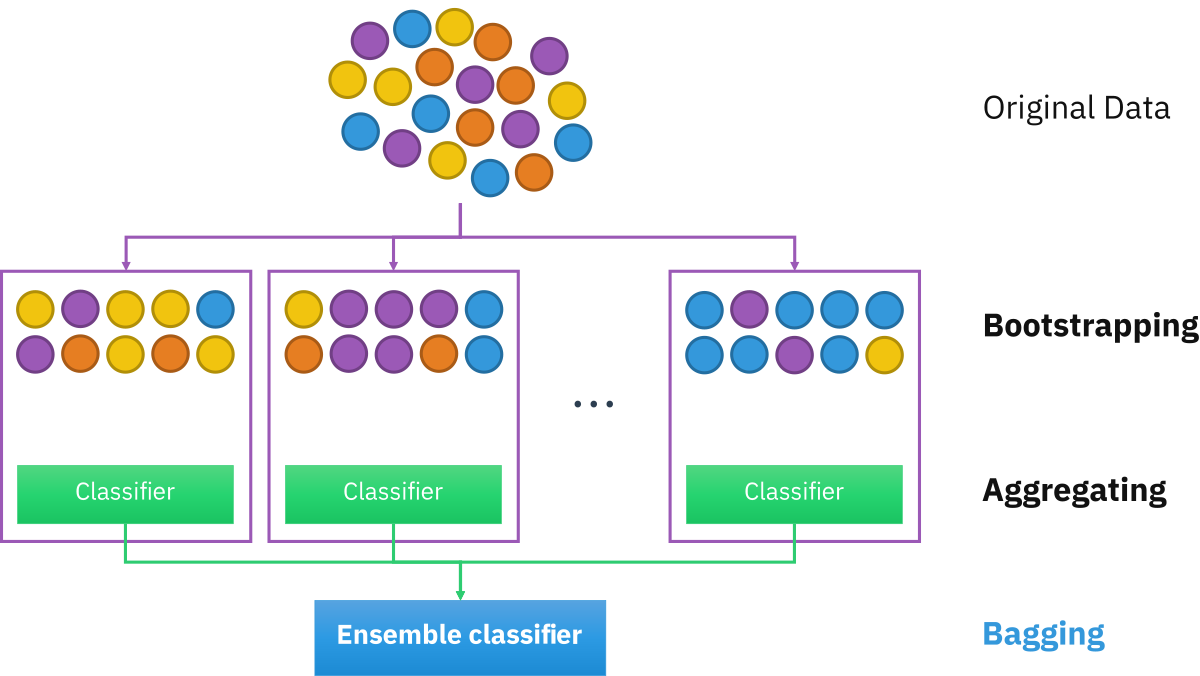

# **Алгоритм**

**Random Forest** является композицией (ансамблем) множества решающих деревьев, что позволяет снизить проблему переобучения и повысить точность в сравнении с одним деревом. Прогноз получается в результате агрегирования ответов множества деревьев. Тренировка деревьев происходит независимо друг от друга (на разных подмножествах), что не просто решает проблему построения одинаковых деревьев на одном и том же наборе данных, но и делает этот алгоритм весьма удобным для применения в системах распределённых вычислений. Вообще, идея бэггинга, предложенная Лео Брейманом, хорошо подходит для распределения вычислений.


Для бэггинга (независимого обучения алгоритмов классификации, где результат определяется голосованием) есть смысл использовать большое количество деревьев решений с достаточно большой глубиной. Во время классификации финальным результатом будет тот класс, за который проголосовало большинство деревьев, при условии, что одно дерево обладает одним голосом.


Так, например, если в задаче бинарной классификации была сформирована беггинг-модель с 500 деревьями(у всех одинаковое количество признаков, но малое количество строк), среди которых 100 указывают на нулевой класс, а остальные 400 на первый класс, то в результате модель будет предсказывать именно первый класс. Если использовать Random Forest(разное кол-во выделенных признаков на деревья) для задач регрессии, то подход выбора того решения, за которое проголосовало большинство деревьев будет неподходящим. Вместо этого происходит выбор среднего решения по всем деревьям.


Random Forest (по причине независимого построения глубоких деревьев) требует весьма много ресурсов, а ограничение на глубину повредит точности (для решения сложных задач нужно построить много глубоких деревьев). Можно заметить, что время обучения деревьев возрастает приблизительно линейно их количеству.


Естественно, увеличение высоты (глубины) деревьев не самым лучшим образом сказывается на производительности, но повышает эффективность этого алгоритма (хотя и вместе с этим повышается склонность к переобучению). Слишком сильно бояться переобучения не следует, так как это будет скомпенсировано числом деревьев. Но и увлекаться тоже не следует. Везде важны оптимально подобранные параметры (гиперпараметры).



Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит следующим образом:


Для каждого $\large n = 1, \dots, N$:

Сгенерировать выборку $\large X_n$ с помощью бутстрэпа;

Построить решающее дерево $\large b_n$ по выборке $\large X_n$:

— по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки

— дерево строится, пока в каждом листе не более $\large n_\text{min}$ объектов или пока не достигнем определенной высоты дерева

— при каждом разбиении сначала выбирается $\large m$ случайных признаков из $\large n$ исходных,
и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, простыми словами — для задачи классификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$, а в задачах регрессии — $\large m = \frac{n}{3}$, где $\large n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов. 

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

Повторю: Основное различие случайного леса и бэггинга на деревьях решений заключается в том, что в случайном лесе выбирается случайное подмножество признаков, и лучший признак для разделения узла определяется из подвыборки признаков, в отличие от бэггинга, где все признаки рассматриваются для разделения в узле.

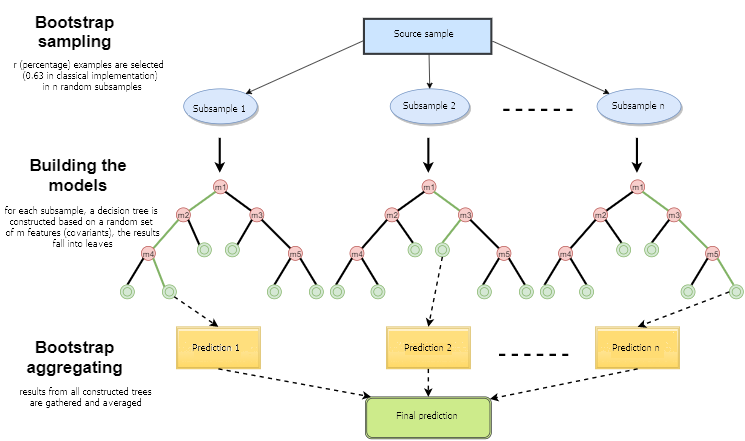

### **Параметры**

Метод случайного леса реализован в библиотеке машинного обучения scikit-learn двумя классами RandomForestClassifier и RandomForestRegressor.


Полный список параметров случайного леса для задачи регрессии:

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor

#sklearn.ensemble.RandomForestRegressor()
    #n_estimators — число деревьев в "лесу" (по дефолту – 10)
    #criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    #max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    #max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    #min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    #min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    #min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    #max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    #min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    #bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    #oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    #n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    #random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    #verbose — вывод логов по построению деревьев (по дефолту 0)
    #warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
#sklearn.ensemble.RandomForestClassifier()
    #riterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")
    #class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами,
    #либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности;
    #также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.


Далее рассмотрим несколько параметров, на которые в первую очередь стоит обратить внимание при построении модели:


n_estimators — число деревьев в "лесу"

criterion — критерий для разбиения выборки в вершине

max_features — число признаков, по которым ищется разбиение

min_samples_leaf — минимальное число объектов в листе

max_depth — максимальная глубина дерева

### **Рассмотрим применение случайного леса **
С алгоритмом работают по стандартной схеме, принятой в scikit-learn:



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
# deposit - целевая переменная (yes no)
df_train['deposit'].value_counts()
# преобразуем целевую переменную
# создадим словарь
d = {'no': 0, 'yes': 1}

# заменим в колонке deposit значения согласно словарю d с помощью методов map и fillna()
df_train['deposit'] = df_train['deposit'].map(d).fillna(df_train['deposit'])
# вектор признаков X и вектор целевой переменной Y

cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = df_train[cols]
y = df_train['deposit']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)


# далее - (X, y) - обучение, (X2, y2) - контроль
# модель - здесь (для контраста) рассмотрим регрессор
tree = RandomForestClassifier()
models = [tree]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(Y_test, y_pred))
    print(recall_score(Y_test, y_pred))
    print(precision_score(Y_test, y_pred)) то
model.fit(X,y) # обучение


Общая размерность датасета train: (7813, 7)
Размерность X_train: (7813, 7)
Размерность X_test: (5469,)
0.7956484641638225
0.7853962600178095
0.7875


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#  Плюсы и минусы случайного леса

Плюсы:
— имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; точность сравнима с точностью бустинга

— практически не чувствителен к выбросам в данных из-за случайного сэмлирования

— не чувствителен к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков, связано с выбором случайных подпространств

— не требует тщательной настройки параметров, хорошо работает «из коробки». С помощью «тюнинга» параметров можно достичь прироста от 0.5 до 3% точности в зависимости от задачи и данных

— способен эффективно обрабатывать данные с большим числом признаков и классов

— одинаково хорошо обрабатывет как непрерывные, так и дискретные признаки

— редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию, но на валидации, после достижения определенного количества деревьев, кривая обучения выходит на асимптоту

— для случайного леса существуют методы оценивания значимости отдельных 
признаков в модели

— хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущенна

— предполагает возможность сбалансировать вес каждого класса на всей выборке, либо на подвыборке каждого дерева

— вычисляет близость между парами объектов, которые могут использоваться при кластеризации, обнаружении выбросов или (путем масштабирования) дают интересные представления данных

— возможности, описанные выше, могут быть расширены до неразмеченных данных, что приводит к возможности делать кластеризацию и визуализацию данных, обнаруживать выбросы

— высокая параллелизуемость и масштабируемость.


Минусы:
— в отличие от одного дерева, результаты случайного леса сложнее интерпретировать

— нет формальных выводов (p-values), доступных для оценки важности переменных

— алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков (тексты, Bag of words)

— случайный лес не умеет экстраполировать, в отличие от той же линейной регрессии (но это можно считать и плюсом, так как не будет экстремальных значений в случае попадания выброса)

— алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных

— для данных, включающих категориальные переменные с различным количеством уровней, случайные леса предвзяты в пользу признаков с большим количеством уровней: когда у признака много уровней, дерево будет сильнее подстраиваться именно под эти признаки, так как на них можно получить более высокое значение оптимизируемого функционала (типа прироста информации)

— если данные содержат группы коррелированных признаков, имеющих схожую значимость для меток, то предпочтение отдается небольшим группам перед большими

— больший размер получающихся моделей. Требуется $\large O(NK) $ памяти для хранения модели, где $\large K $ — число деревьев.